# **TUGAS 4**

Materi:
- Matrices
- Matrix Examples

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

## **Nilai Akhir Murid**
---
- Sebagai seorang guru diakhir masa didik, kita ingin menentukan nilai akhir 3 orang siswa. 
- Data yang kita miliki adalah nilai untuk ujian, project, PR, dan quiz. 
- Selain itu, nilai-nilai tersebut memiliki bobot tersendiri terhadap nilai akhir. Berikut detailnya.

| Murid | Ujian | Projects | PR | Quiz        
| :-: | :-: | :-: | :-: | :-: |
| Alexandra | 92 | 100 | 89 | 80 |
| Megan | 72 | 85 | 80 | 75 |
| Britney | 88 | 78 | 85 | 92 |

| Tipe | Bobot | 
| :-: | :-: | 
| Ujian | 40% |
| Projects | 15% |
| PR | 25% |
| Quiz | 20% |

---
**Soal 6**

- Buatlah matrix nilai tiap murid & matrix bobot

In [3]:
# Jawab
nilai_murid = np.array([[92, 100, 89, 80],
                        [72, 85, 80, 75],
                        [88, 78, 85, 92]])
bobot = np.array([[0.40, 0.15, 0.25, 0.20]])

---
**Soal 7**

- Berapa nilai akhir dari setiap murid?

In [4]:
# Jawab
nilai_akhir = np.sum(nilai_murid*bobot, axis=1)
nilai_akhir

array([90.05, 76.55, 86.55])

---
**Soal 8**

- Berapa jumlah murid yang mendapat nilai A? (batas terendah nilai A adalah 80)

In [5]:
# Jawab
jumlah_A = np.sum(nilai_akhir>=80)
jumlah_A

2

## **Electricity Demands Modeling**
---
- Diberikan data electricity demands selama beberapa periode.

   month  electricity
0      0        22.97
1      1         4.35
2      2        30.87
3      3        13.19
4      4        33.68


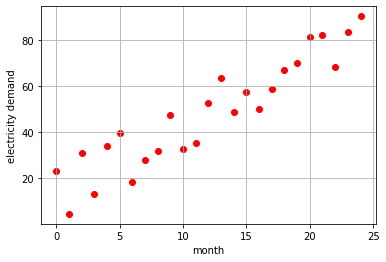

In [17]:
demand_df = pd.read_csv('dataset/data_linalg_tugas04/electricity_demand.csv')
print(demand_df.head(5))

# plot
plt.scatter(demand_df['month'], demand_df['electricity'], c='r')
plt.grid()
plt.xlabel('month')
plt.ylabel('electricity demand')
plt.show()

- Kita ingin prediksi demand 5 bulan kedepan. 
- Kita hire 2 orang data scientist dan menugaskan mereka untuk membuat model. Model didekati secara *linear*.
- Berikut adalah 2 model yang dibuat.
   - Model 1: $\text{electricity} = 3.75\times\text{month} + 0.9$
   - Model 2: $\text{electricity} = 3.0\times\text{month} + 10$

**Jawab Pertanyaan Berikut**
1. Model mana yang kita pakai?
2. Berapa prediksi demand 5 bulan kedepan berdasarkan model yang dipakai?

---
**Soal 9**
- Tulis langkah-langkah yang dibutuhkan untuk menjawab permasalahan tersebut.

In [18]:
# Jawab
langkah = """
Untuk menentukan model yang dipilih, bandingkan performa dari dua model tersebut menggunakan Mean Absolute Error.
- temukan nilai y_hat dari masing-masing model
- mencari nilai MAE
- tentukan model yang lebih baik
"""
# Hint: perbandingan error, Mean Absolute Error.

---
**Soal 10**

- Carilah jawaban dari permasalahan mengikuti langkah-langkah yang Anda tulis di soal nomor 9

In [19]:
# Ubah dataframe ke numpy array
data = demand_df.to_numpy()

# Mencari nilai y_hat
x_temp = np.array([[data[i,0], 1] for i in range(len(data))])

y_hat_1 = np.matmul(x_temp, np.array([3.75, 0.9]))
y_hat_2 = np.matmul(x_temp, np.array([3, 10]))

print(f'y_hat_1 : \n{y_hat_1}\n')
print(f'y_hat_2 : \n{y_hat_2}\n')

y_hat_1 : 
[ 0.9   4.65  8.4  12.15 15.9  19.65 23.4  27.15 30.9  34.65 38.4  42.15
 45.9  49.65 53.4  57.15 60.9  64.65 68.4  72.15 75.9  79.65 83.4  87.15
 90.9 ]

y_hat_2 : 
[10. 13. 16. 19. 22. 25. 28. 31. 34. 37. 40. 43. 46. 49. 52. 55. 58. 61.
 64. 67. 70. 73. 76. 79. 82.]



In [20]:
# Mencari nilai MAE
mae_1 = np.abs(np.sum(data[:,1] - y_hat_1))/len(data)
mae_2 = np.abs(np.sum(data[:,1] - y_hat_2))/len(data)

print(f'MAE-1 = {mae_1}')
print(f'MAE-2 = {mae_2}')

MAE-1 = 2.476399999999999
MAE-2 = 2.3764000000000003


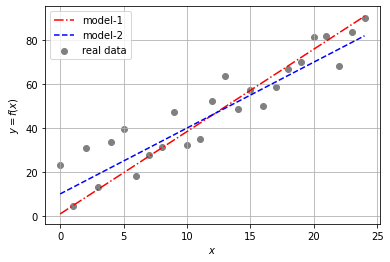

In [21]:
# Menentukan model terbaik
best_model = 'model-2'

# Plot
plt.scatter(data[:,0], data[:,1], c='grey', label='real data')
plt.plot(data[:,0], y_hat_1, '-.r', label='model-1')
plt.plot(data[:,0], y_hat_2, '--b', label='model-2')
plt.grid()
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y = f(x)$')
plt.show()

## **SOAL BONUS: Blur Lena**
---
- Kita punya gambar Lena

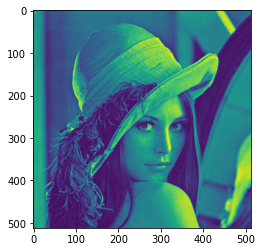

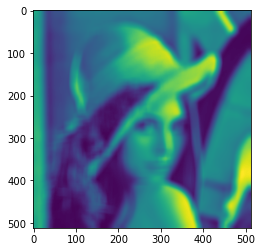

In [22]:
# Load gambar
img = cv2.imread('dataset/data_linalg_tugas04/lena.png', 0)
blur = cv2.blur(img,(20,20))
plt.imshow(img)
plt.show()
plt.imshow(blur)
plt.show()